# Handin Exercise 6

Create a module containing a class with the following methods:
1. __init__(self, url_list)
2. download(url,filename) raises NotFoundException when url returns 404
3. multi_download() uses threads to download multiple urls as text and stores filenames as a property
4. __iter__() returns an iterator
5. __next__() returns the next filename (and stops when there are no more)
6. urllist_generator() returns a generator to loop through the urls
7. avg_vowels(text) - a rough estimate on readability returns average number of vowels in the words of the text
8. hardest_read() returns the filename of the text with the highest vowel score (use all the cpu cores on the computer for this work.

### Ex 2
Create a notebook and import your module from above
1. Find 10 books on https://www.gutenberg.org/browse/scores/top and download them using an object of the class you just created before
2. Test the different methods of your class
3. Make a bar plot with a sorted list of books on x-axis and avg vowels on y-axis

In [1]:
import matplotlib.pyplot as plt
from UrlManager import UrlManager

objs = {
        "https://www.gutenberg.org/files/1342/1342-0.txt":"Pride And Prejudice.txt",
        "https://www.gutenberg.org/files/11/11-0.txt":"Alice's Adventures in Wonderland.txt",
        "http://www.gutenberg.org/cache/epub/16328/pg16328.txt":"Beowulf.txt",
        "https://www.gutenberg.org/files/1661/1661-0.txt":"The Adventures of Sherlock Holmes.txt",
        "https://www.gutenberg.org/files/1952/1952-0.txt":"The Yellow Wallpaper.txt",
        "https://www.gutenberg.org/files/98/98-0.txt":"A Tale of Two Cities.txt",
        "https://www.gutenberg.org/files/2701/2701-0.txt":"Moby Dick.txt",
        "https://www.gutenberg.org/files/84/84-0.txt":"Frankenstein; Or, The Modern Prometheus.txt",
        "http://www.gutenberg.org/cache/epub/5200/pg5200.txt":"Metamorphosis.txt",
        "http://www.gutenberg.org/cache/epub/1497/pg1497.txt":"The Republic.txt"
    }

# Tests the download and the multi_download (multi calls the download funtion)
manager = UrlManager(objs)
manager.multi_download()

In [2]:
# Testing the iter() and next() functions
for s in manager.iter():
    print(s)

https://www.gutenberg.org/files/1342/1342-0.txt
https://www.gutenberg.org/files/11/11-0.txt
http://www.gutenberg.org/cache/epub/16328/pg16328.txt
https://www.gutenberg.org/files/1661/1661-0.txt
https://www.gutenberg.org/files/1952/1952-0.txt
https://www.gutenberg.org/files/98/98-0.txt
https://www.gutenberg.org/files/2701/2701-0.txt
https://www.gutenberg.org/files/84/84-0.txt
http://www.gutenberg.org/cache/epub/5200/pg5200.txt
http://www.gutenberg.org/cache/epub/1497/pg1497.txt


In [3]:
url_gen = manager.url_list_generator()

for url in url_gen:
    print(url)

https://www.gutenberg.org/files/1342/1342-0.txt
https://www.gutenberg.org/files/11/11-0.txt
http://www.gutenberg.org/cache/epub/16328/pg16328.txt
https://www.gutenberg.org/files/1661/1661-0.txt
https://www.gutenberg.org/files/1952/1952-0.txt
https://www.gutenberg.org/files/98/98-0.txt
https://www.gutenberg.org/files/2701/2701-0.txt
https://www.gutenberg.org/files/84/84-0.txt
http://www.gutenberg.org/cache/epub/5200/pg5200.txt
http://www.gutenberg.org/cache/epub/1497/pg1497.txt


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, &#39;&#39;),
  Text(0, 0, &#39;&#39;),
  Text(0, 0, &#39;&#39;),
  Text(0, 0, &#39;&#39;),
  Text(0, 0, &#39;&#39;),
  Text(0, 0, &#39;&#39;),
  Text(0, 0, &#39;&#39;),
  Text(0, 0, &#39;&#39;),
  Text(0, 0, &#39;&#39;),
  Text(0, 0, &#39;&#39;)])

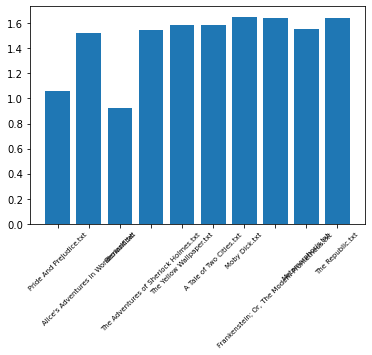

In [9]:
book_dict = dict()
url_gen = manager.url_list_generator()
for url in url_gen:
    filename = manager.url_list[url]
    book_dict[filename] = manager.avg_vowels(manager.url_list[url])

plt.bar(book_dict.keys(), book_dict.values())
plt.xticks(rotation=45, fontsize = 7)

In [5]:
print(manager.hardest_read())

Moby Dick.txt
